<a href="https://colab.research.google.com/github/badroohiman/churn-prediction/blob/main/Customer_Churn_Prediction_with_Pre_trained_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,"29 ,85","29 ,85",No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,"56 ,95","1889 ,5",No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,"53 ,85","108 ,15",Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),"42 ,3","1840 ,75",No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,"70 ,7","151 ,65",Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [5]:
df.drop('customerID', axis=1, inplace=True)

In [6]:
# Attempt conversion to numeric
numeric_totalcharges = pd.to_numeric(df['TotalCharges'],errors='coerce')

# Identify rows where conversion to numeric failed
problematic_values = df.loc[numeric_totalcharges.isna(), 'TotalCharges']
print(problematic_values.unique())

['29 ,85' '1889 ,5' '108 ,15' '1840 ,75' '151 ,65' '820 ,5' '1949 ,4'
 '301 ,9' '3046 ,05' '3487 ,95' '587 ,45' '326 ,8' '5681 ,1' '5036 ,3'
 '2686 ,05' '7895 ,15' '1022 ,95' '7382 ,25' '528 ,35' '1862 ,9' '39 ,65'
 '202 ,25' '20 ,15' '3505 ,1' '2970 ,3' '1530 ,6' '4749 ,15' '30 ,2'
 '6369 ,45' '1093 ,1' '6766 ,95' '181 ,65' '1874 ,45' '20 ,2' '45 ,25'
 '7251 ,7' '316 ,9' '3548 ,3' '3549 ,25' '1105 ,4' '475 ,7' '4872 ,35'
 '418 ,25' '4861 ,45' '981 ,45' '3906 ,7' '144 ,15' '4217 ,8' '4254 ,1'
 '3838 ,75' '1426 ,4' '1752 ,65' '633 ,3' '4456 ,35' ' ']


In [7]:
df['TotalCharges'] = df['TotalCharges'].astype(str).str.replace(' ,', '.')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
# Attempt conversion to numeric
numeric_totalcharges = pd.to_numeric(df['MonthlyCharges'],errors='coerce')

# Identify rows where conversion to numeric failed
problematic_values = df.loc[numeric_totalcharges.isna(), 'MonthlyCharges']
print(problematic_values.unique())

['29 ,85' '56 ,95' '53 ,85' '42 ,3' '70 ,7' '99 ,65' '89 ,1' '29 ,75'
 '104 ,8' '56 ,15' '49 ,95' '18 ,95' '100 ,35' '103 ,7' '105 ,5' '113 ,25'
 '20 ,65' '106 ,7' '55 ,2' '90 ,05' '39 ,65' '19 ,8' '20 ,15' '59 ,9'
 '59 ,6' '55 ,3' '99 ,35' '30 ,2' '90 ,25' '64 ,7' '96 ,35' '95 ,5'
 '66 ,15' '20 ,2' '45 ,25' '99 ,9' '69 ,7' '74 ,8' '106 ,35' '97 ,85'
 '49 ,55' '69 ,2' '20 ,75' '79 ,85' '76 ,2' '84 ,5' '49 ,25' '80 ,65'
 '79 ,75' '64 ,15' '99 ,1' '69 ,5' '74 ,85']


In [9]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype(str).str.replace(' ,', '.')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'])

In [10]:
def unique_value_for_categorical_column(column_names):
  for column_name in column_names:
    print(30*'-')
    print(column_name)
    print('Unique values: ',df[column_name].unique())
    print('length:', len(df[column_name].unique()))

In [12]:
# Select columns with type "object" (string-like data)
string_columns = df.select_dtypes(include=['object', 'string'])
unique_value_for_categorical_column(string_columns.columns)


------------------------------
gender
Unique values:  ['Female' 'Male']
length: 2
------------------------------
Partner
Unique values:  ['Yes' 'No']
length: 2
------------------------------
Dependents
Unique values:  ['No' 'Yes']
length: 2
------------------------------
PhoneService
Unique values:  ['No' 'Yes']
length: 2
------------------------------
MultipleLines
Unique values:  ['No phone service' 'No' 'Yes']
length: 3
------------------------------
InternetService
Unique values:  ['DSL' 'Fiber optic' 'No']
length: 3
------------------------------
OnlineSecurity
Unique values:  ['No' 'Yes' 'No internet service']
length: 3
------------------------------
OnlineBackup
Unique values:  ['Yes' 'No' 'No internet service']
length: 3
------------------------------
DeviceProtection
Unique values:  ['No' 'Yes' 'No internet service']
length: 3
------------------------------
TechSupport
Unique values:  ['No' 'Yes' 'No internet service']
length: 3
------------------------------
StreamingTV
Uniqu

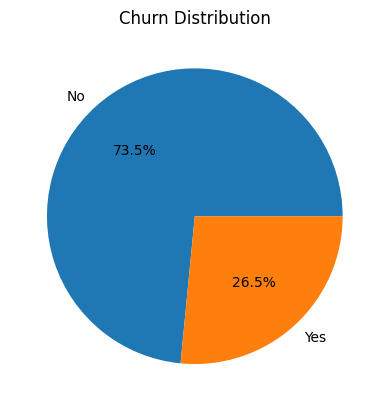

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().index, autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()

In [14]:
def bar_chart_for_categorical_column(column_names):
  for column_name in column_names:
    df[column_name].value_counts().plot(kind='bar')
    plt.title(column_name)
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.show()


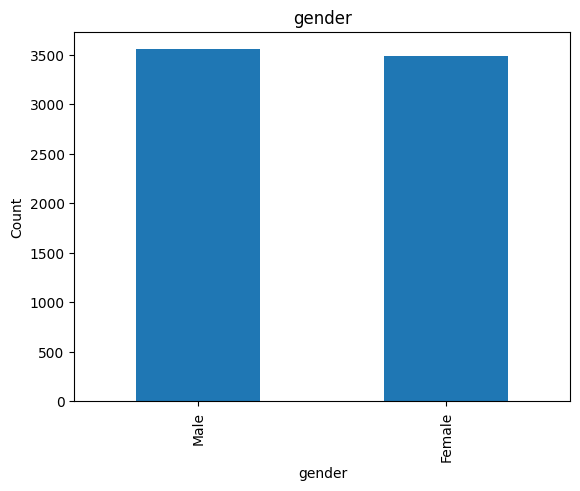

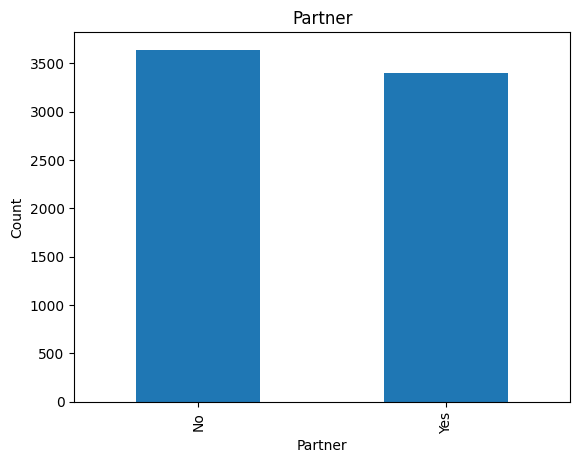

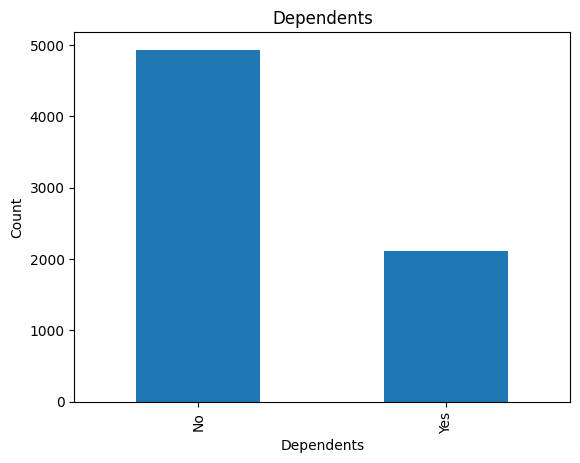

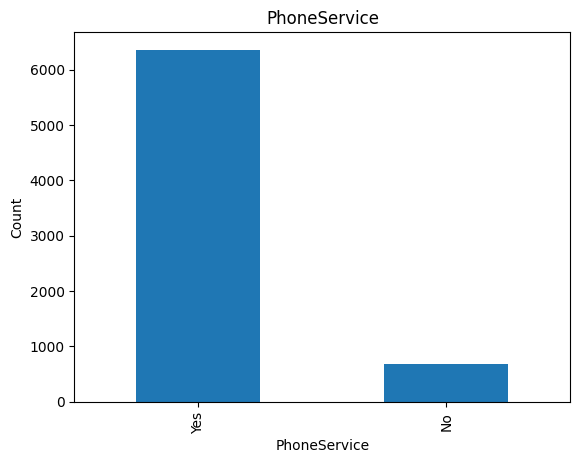

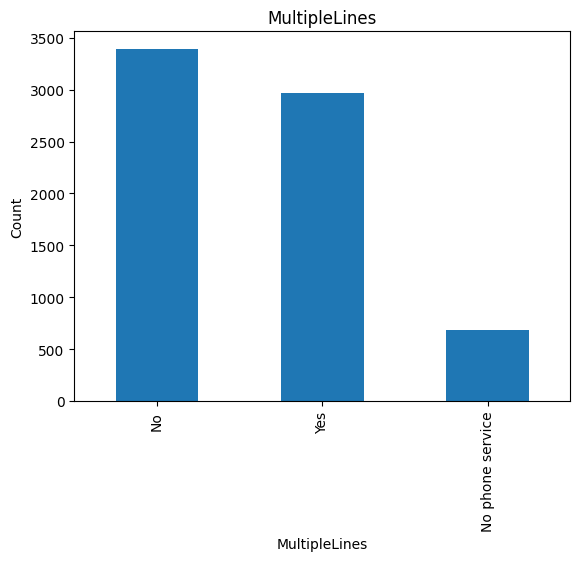

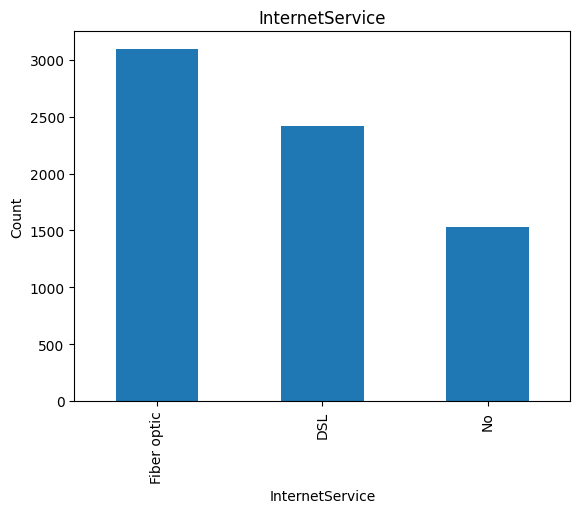

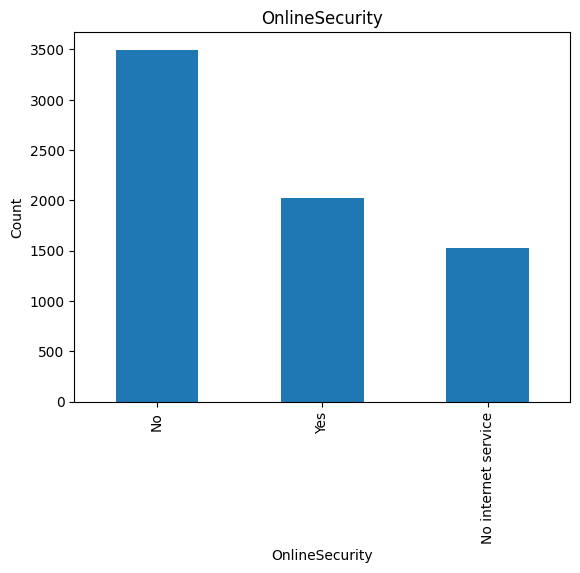

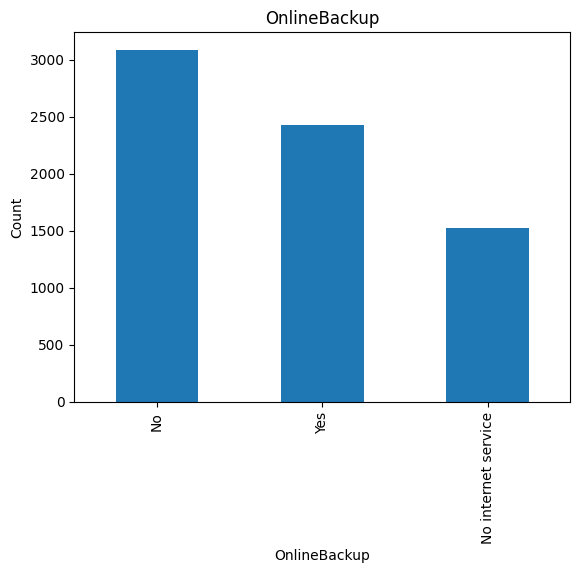

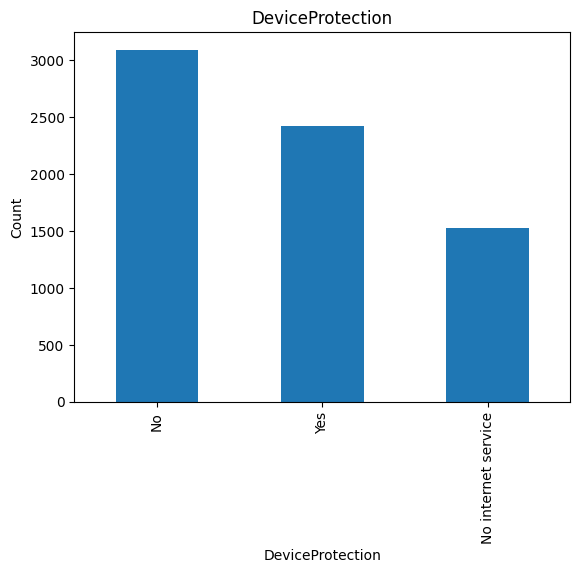

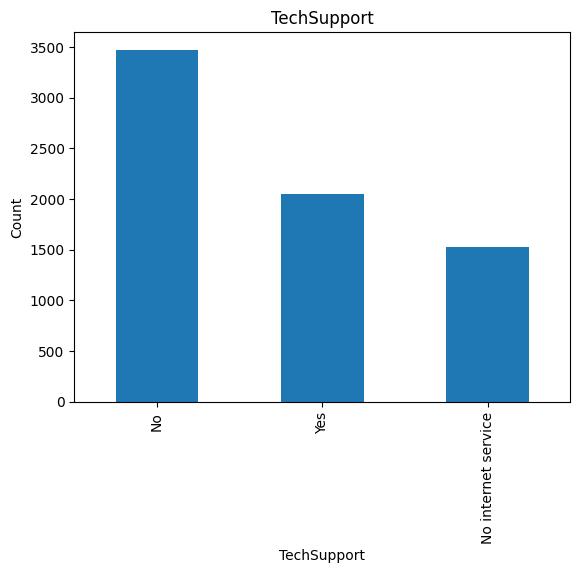

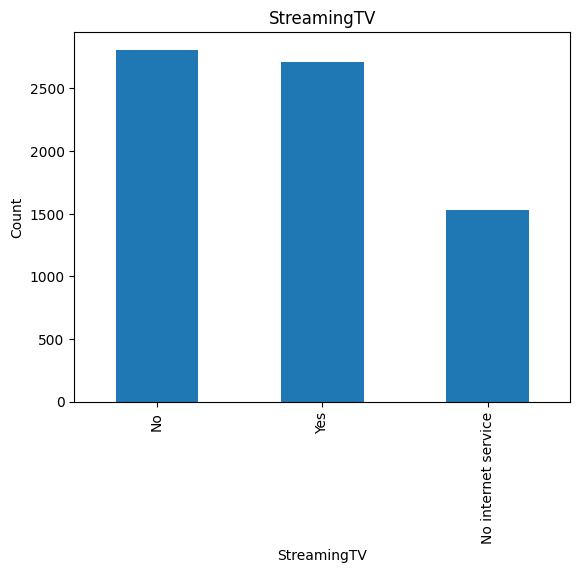

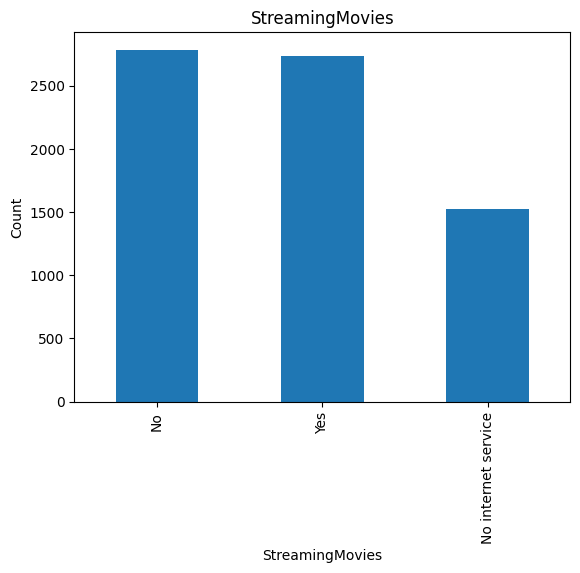

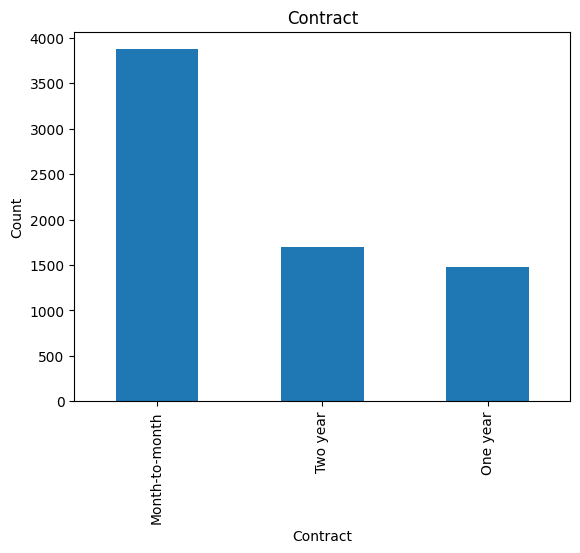

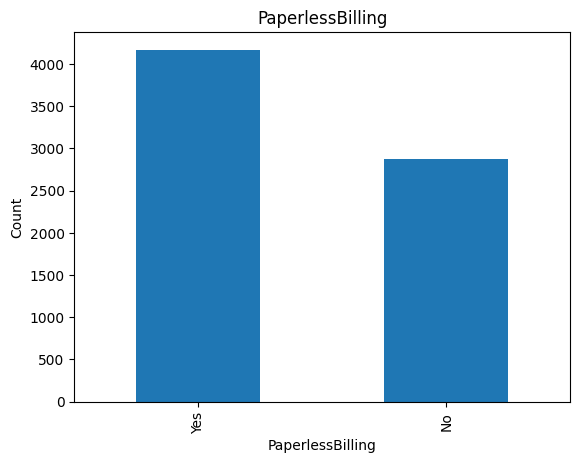

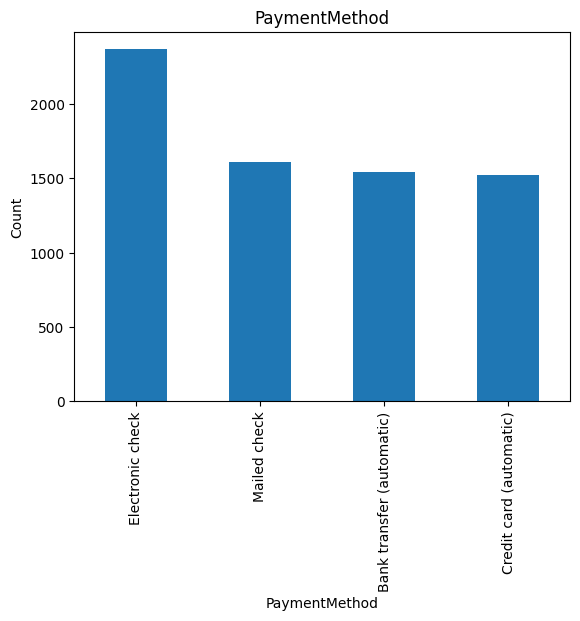

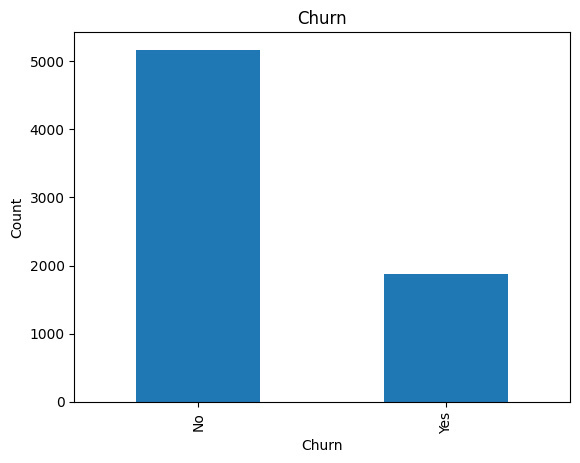

In [15]:
bar_chart_for_categorical_column(string_columns)

In [16]:
def bar_chart_for_categorical_column_based_on_churn(column_names):
    for column_name in column_names:
        plt.figure(figsize=(8, 4))  # Optional: bigger chart
        sns.countplot(x=column_name, data=df, hue='Churn')  # Countplot for counts
        plt.title(f'Count of {column_name} by Churn')
        plt.xticks(rotation=45)  # Rotate x-axis labels if needed
        plt.tight_layout()
        plt.show()


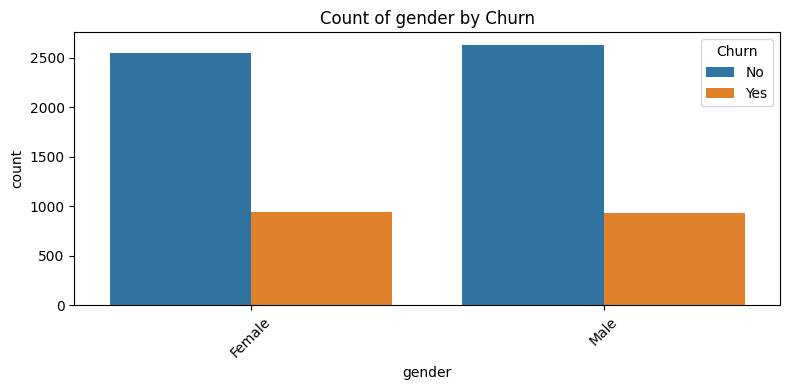

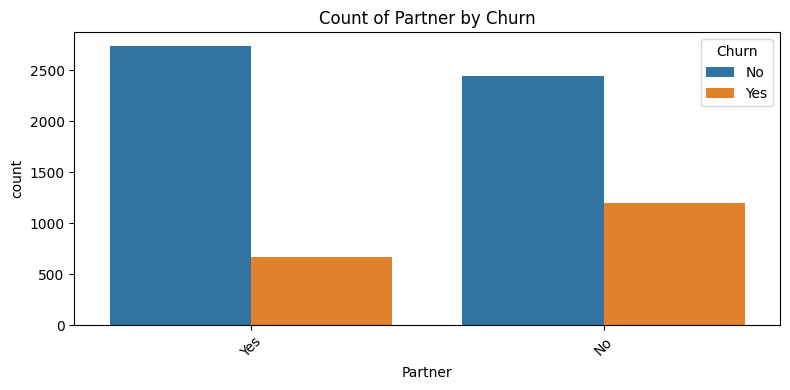

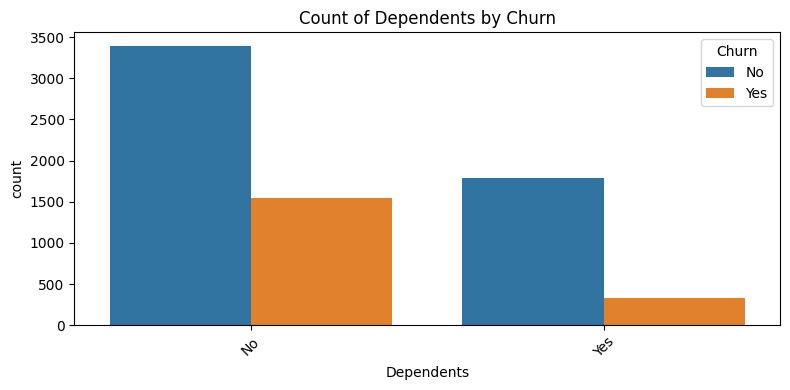

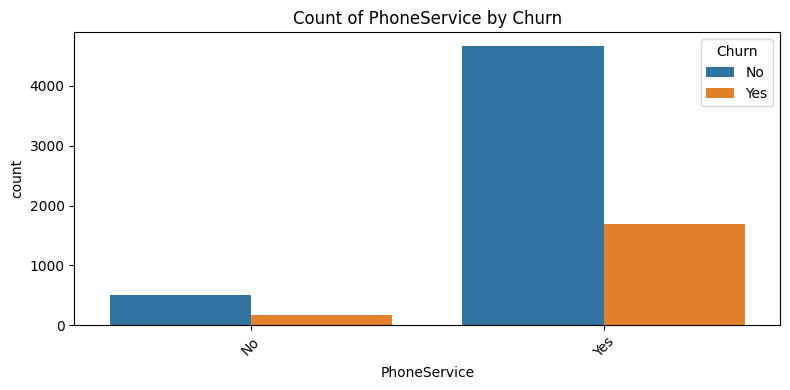

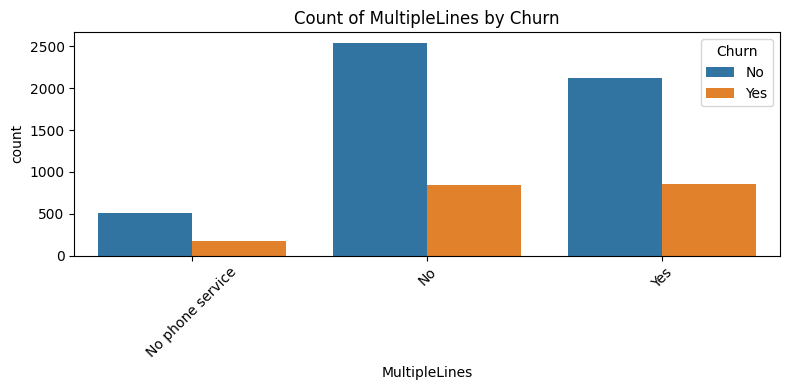

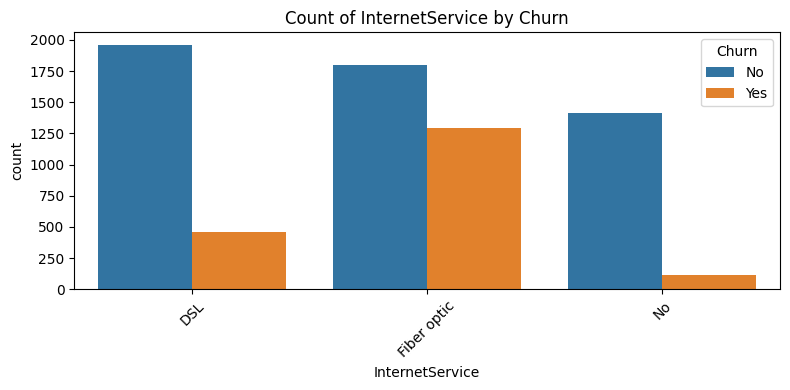

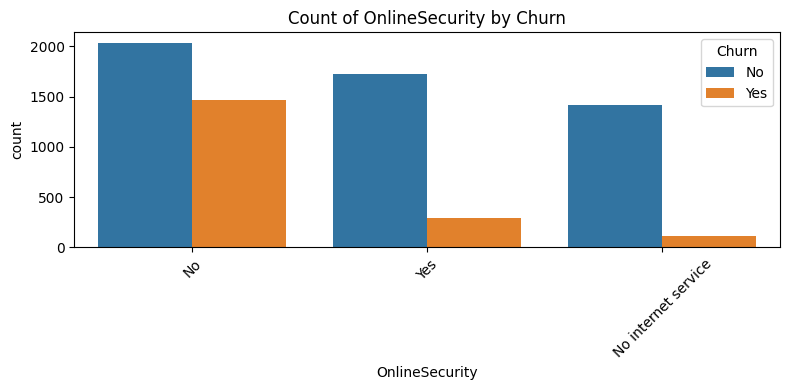

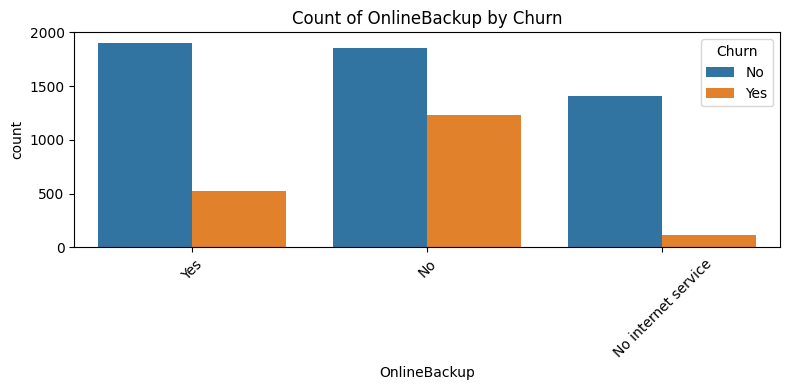

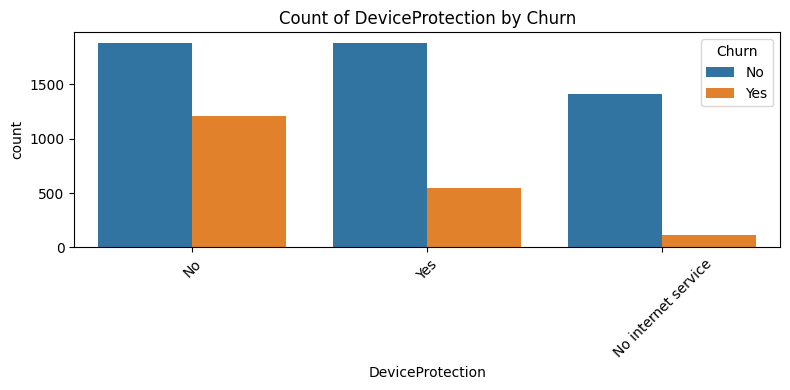

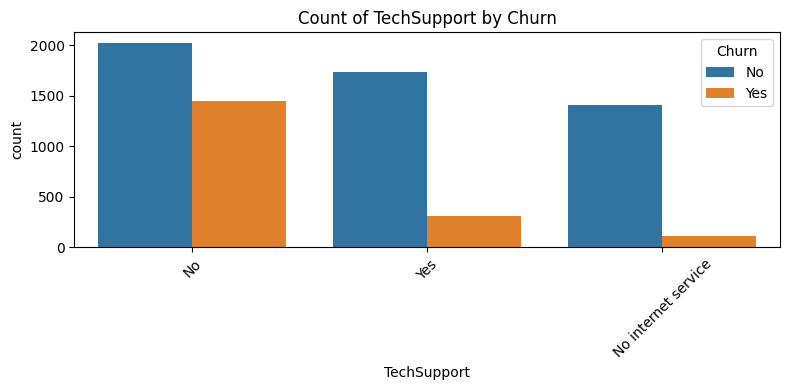

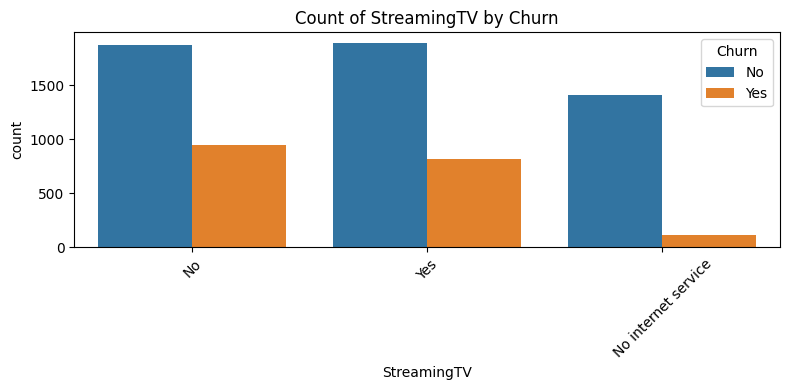

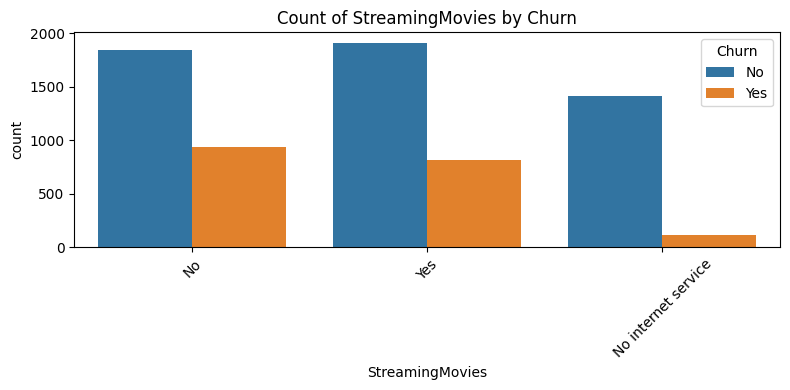

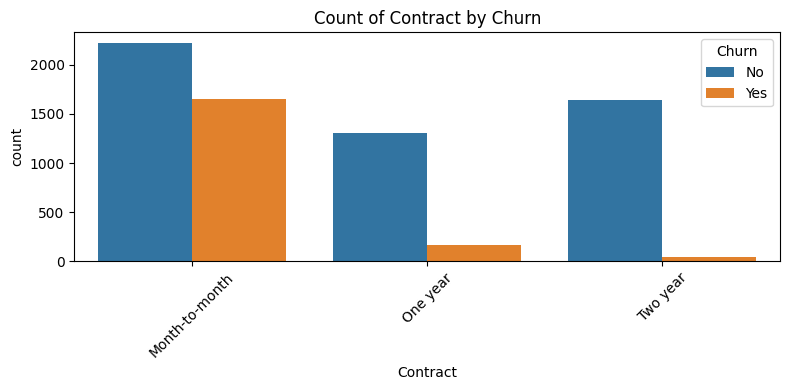

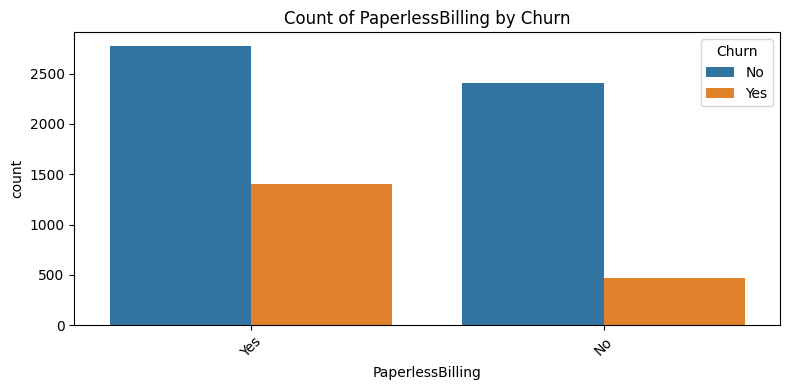

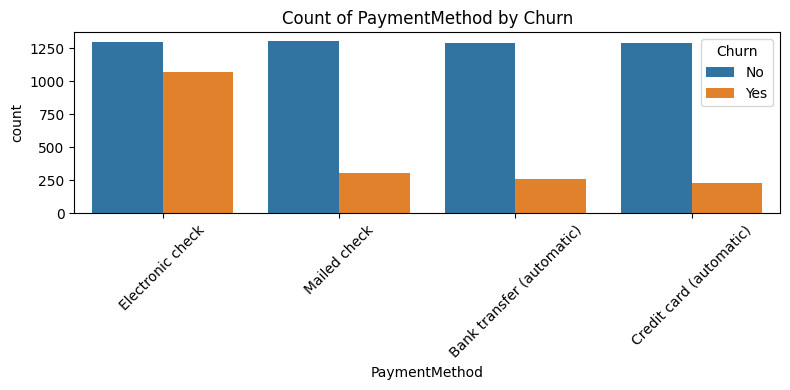

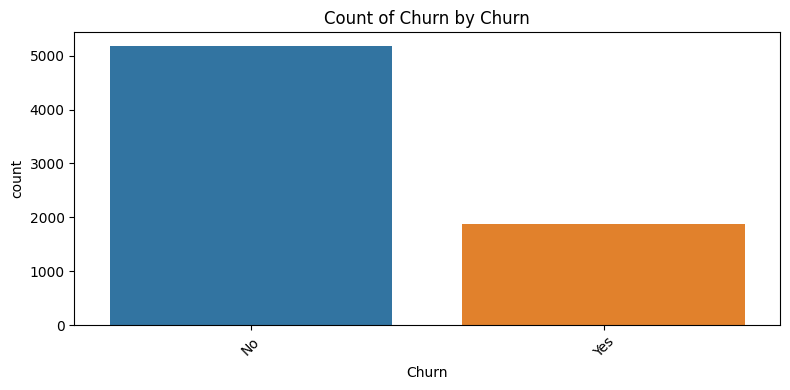

In [17]:
bar_chart_for_categorical_column_based_on_churn(string_columns)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assuming your dataset is in a DataFrame called df
# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# One-hot encode categorical variables if needed (optional for tree models, depends on dataset)
X_encoded = pd.get_dummies(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Train evaluation
y_pred_train = dt_model.predict(X_train)
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.85      0.89      0.87      4139
         Yes       0.65      0.56      0.60      1495

    accuracy                           0.80      5634
   macro avg       0.75      0.73      0.74      5634
weighted avg       0.80      0.80      0.80      5634

[[3693  446]
 [ 659  836]]
              precision    recall  f1-score   support

          No       0.85      0.88      0.87      1035
         Yes       0.63      0.57      0.60       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

[[913 122]
 [162 212]]
